In [21]:
import httplib2
import json
import matplotlib.pyplot as plt
import matplotlib.dates as pltdates
import numpy as np
import pandas as pd
from datetime import datetime

def convertToDate(s): 
    return datetime.strptime(str(s), '%Y%m%d').strftime('%m/%d/%Y')

countrySummary = 'https://covidtracking.com/api/us/daily'
statesCurrent = 'https://covidtracking.com/api/states/daily'
h = httplib2.Http('.cache')

# Get data
(response,stateDataRaw) = h.request(statesCurrent,'GET')
stateDataDf = pd.DataFrame(json.loads(stateDataRaw.decode('UTF-8')))

(response,countryRaw) = h.request(countrySummary,'GET')
countryJson = json.loads(countryRaw.decode('UTF-8'))
countryDf = pd.DataFrame(countryJson)


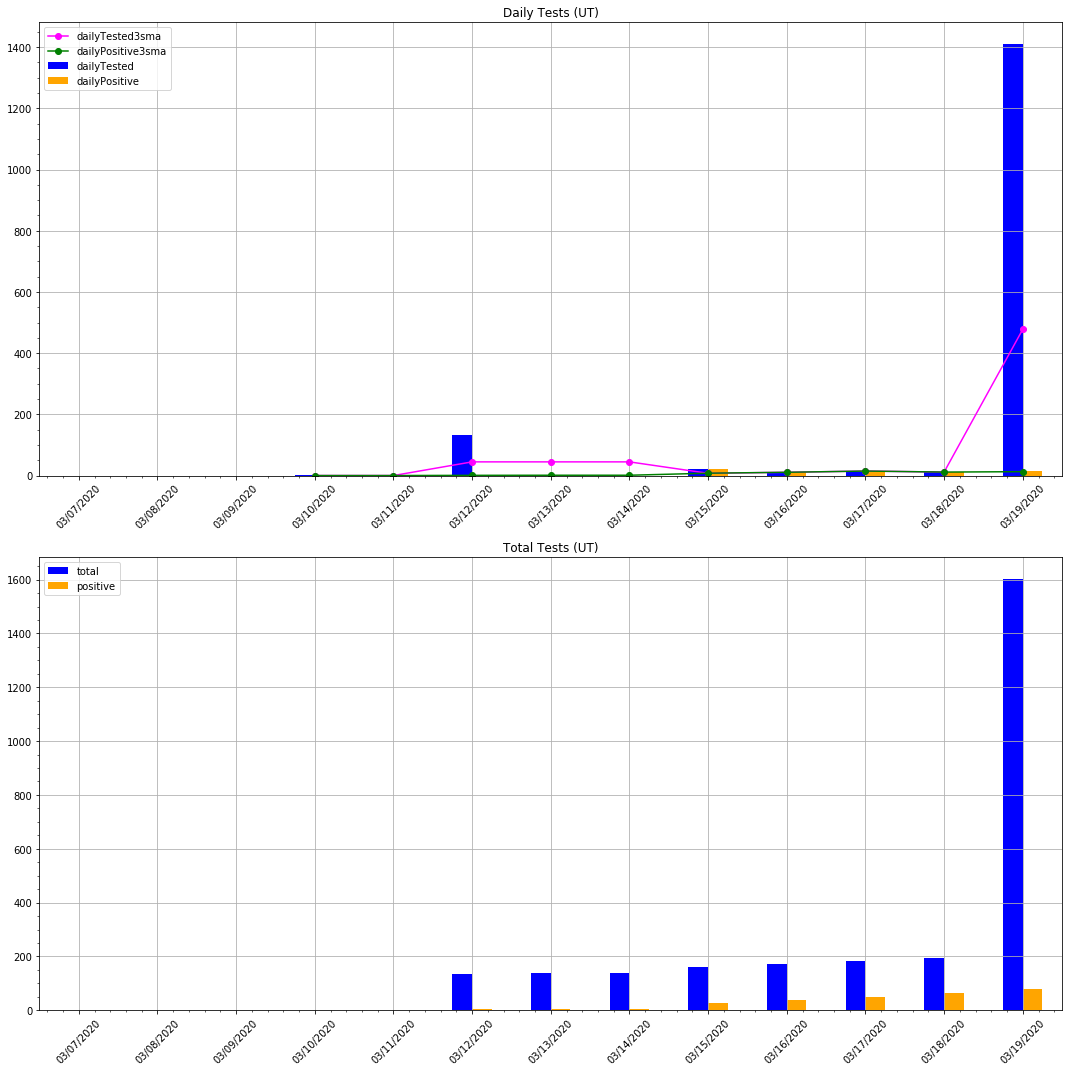

In [28]:
# Create figure/axes
stateFig, (utahDailyTested,utahTotalTests) = plt.subplots(nrows=2,ncols=1,figsize=(15,15))

utahDataDf = stateDataDf[stateDataDf['state']=='UT'].sort_values(by=['date']).reset_index()
utahDataDf['dateStr'] = utahDataDf['date'].apply(convertToDate)
utahDataDf['dailyTested'] = utahDataDf['total'].diff()
utahDataDf['dailyTested3sma'] = utahDataDf['dailyTested'].rolling(window=3).mean()

utahDataDf['dailyPositive'] = utahDataDf['positive'].diff()
utahDataDf['dailyPositive3sma'] = utahDataDf['dailyPositive'].rolling(window=3).mean()

utahDataDf['pctChangeTested'] = utahDataDf['total'].pct_change(fill_method='pad')
utahDataDf['pctChangeDeaths'] = utahDataDf['death'].pct_change(fill_method='pad')

# Draw Utah data
utahTotalTests.set_title('Total Tests (UT)')
utahDailyTested.set_title('Daily Tests (UT)')

utahDataDf[['dailyTested','dailyPositive']].plot.bar(ax=utahDailyTested, color=['blue','orange'])
utahDataDf['dailyTested3sma'].plot.line(ax=utahDailyTested, color='magenta', marker='o')
utahDataDf['dailyPositive3sma'].plot.line(ax=utahDailyTested, color='green', marker='o')
utahDataDf[['total', 'positive']].plot.bar(ax=utahTotalTests, use_index=True, color=['blue','orange'])
utahDataDf['death'].plot.bar(ax=utahTotalDeaths)

utahTotalTests.legend()
utahTotalTests.grid()
utahTotalTests.minorticks_on()
utahTotalTests.set_xticklabels(utahDataDf['dateStr'], {'rotation':45})

utahDailyTested.legend()
utahDailyTested.grid()
utahDailyTested.minorticks_on()
utahDailyTested.set_xticklabels(utahDataDf['dateStr'], {'rotation':45})


stateFig.tight_layout()

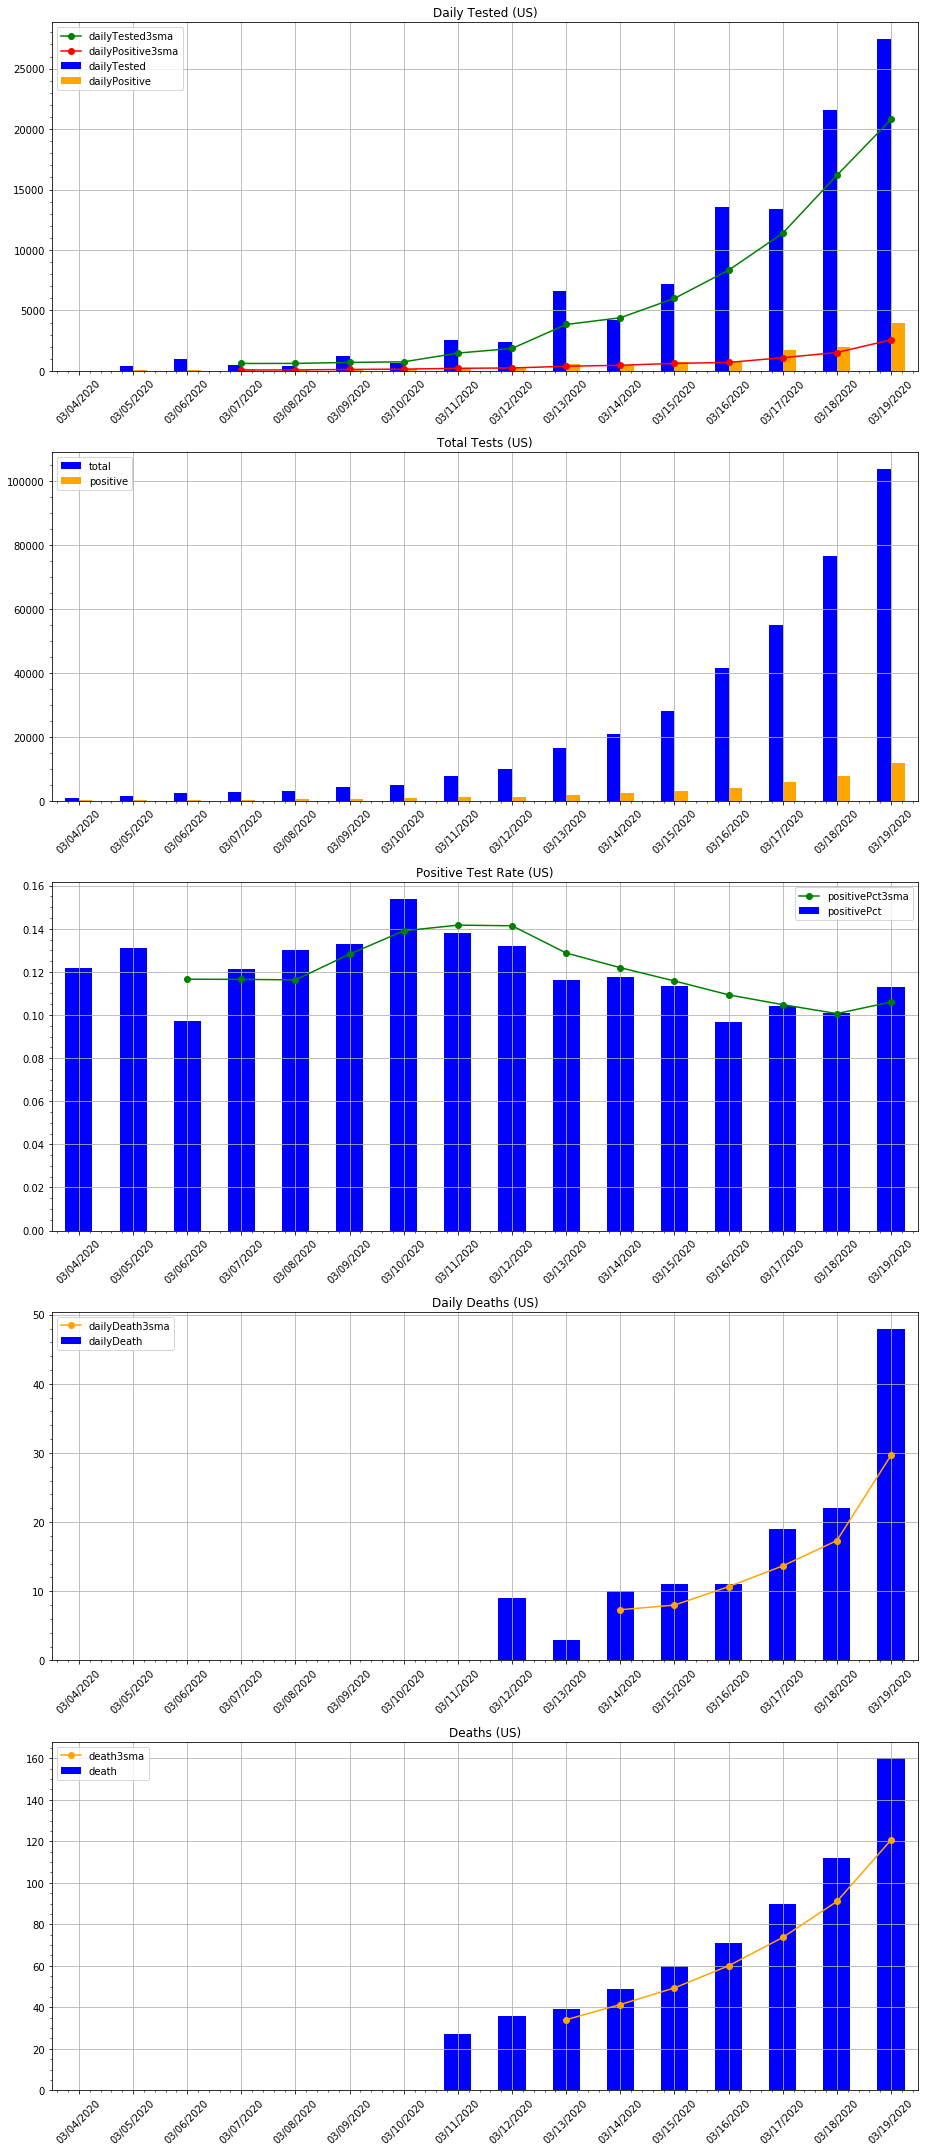

In [31]:
# Create figure/axes
countryFig, (usDailyTested,usTotalTests,usPositivePct,usDailyDeaths,usDeaths) = plt.subplots(nrows=5,ncols=1,figsize=(13,30))

# Get US data       
countryDf['dateStr'] = countryDf['date'].apply(convertToDate)
countryDf['dailyTested'] = countryDf['total'].diff()
countryDf['dailyTested3sma'] = countryDf['dailyTested'].rolling(window=3).mean()

countryDf['dailyPositive'] = countryDf['positive'].diff()
countryDf['dailyPositive3sma'] = countryDf['dailyPositive'].rolling(window=3).mean()

countryDf['positivePct'] = countryDf.apply(lambda o: o['positive']/o['total'], axis=1)
countryDf['positivePct3sma'] = countryDf['positivePct'].rolling(window=3).mean()

countryDf['dailyDeath'] = countryDf['death'].diff()
countryDf['dailyDeath3sma'] = countryDf['dailyDeath'].rolling(window=3).mean()

countryDf['death3sma'] = countryDf['death'].rolling(window=3).mean()

countryDf['pctChangeTested'] = countryDf['total'].pct_change(fill_method='pad')
countryDf['pctChangeDeaths'] = countryDf['death'].pct_change(fill_method='pad')
countryDf['presumptivePositives'] = countryDf['death'].apply(lambda d:  d/.02)

# Draw country data
usDailyTested.set_title('Daily Tested (US)')
usPositivePct.set_title('Positive Test Rate (US)')
usTotalTests.set_title('Total Tests (US)')
usDailyDeaths.set_title('Daily Deaths (US)')
usDeaths.set_title('Deaths (US)')

countryDf[['dailyTested','dailyPositive']].plot.bar(ax=usDailyTested, color=['blue','orange'])
countryDf['dailyTested3sma'].plot.line(ax=usDailyTested, color='green', marker='o')
countryDf['dailyPositive3sma'].plot.line(ax=usDailyTested, color='red', marker='o')
countryDf['positivePct'].plot.bar(ax=usPositivePct, color='blue')
countryDf['positivePct3sma'].plot.line(ax=usPositivePct, color='green', marker='o')
countryDf['dailyDeath'].plot.bar(ax=usDailyDeaths, color='blue')
countryDf['dailyDeath3sma'].plot.line(ax=usDailyDeaths, color='orange', marker='o')
countryDf['death'].plot.bar(ax=usDeaths, color='blue')
countryDf['death3sma'].plot.line(ax=usDeaths, color='orange',marker='o')
countryDf[['total','positive']].plot.bar(use_index=True, ax=usTotalTests, color=['blue','orange'])
usDailyTested.legend()
usDailyTested.grid()
usDailyTested.minorticks_on()
usDailyTested.set_xticklabels(countryDf['dateStr'], {'rotation':45})

usTotalTests.legend()
usTotalTests.grid()
usTotalTests.minorticks_on()
usTotalTests.set_xticklabels(countryDf['dateStr'], {'rotation':45})

usPositivePct.legend()
usPositivePct.grid()
usPositivePct.minorticks_on()
usPositivePct.set_xticklabels(countryDf['dateStr'], {'rotation':45})

usDailyDeaths.legend()
usDailyDeaths.grid()
usDailyDeaths.minorticks_on()
usDailyDeaths.set_xticklabels(countryDf['dateStr'], {'rotation': 45})
usDeaths.legend()
usDeaths.grid()
usDeaths.minorticks_on()
usDeaths.set_xticklabels(countryDf['dateStr'], {'rotation':45})

#countryDf['positive'].plot.bar(ax=usTotalTests,color='yellow')
#countryDf[['date','pctChangeTested','pctChangeDeaths']].plot.bar(ax=percAx,x='date')                   

countryFig.tight_layout()
